In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import modulos as mod
import preprocessors as pp
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import re

C:\Users\Ferickcen\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
dataset = pd.read_csv("Live.csv") #,parse_dates=['status_published']

In [3]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(7050, 16)

In [5]:
dataset.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

### Descarte Columnas No Útiles

In [7]:
dataset = dataset.drop(['Column1', 'Column2', 'Column3','Column4'], axis=1)

### Eliminación de duplicados

#### Se validó que la columna status_id contiene duplicados por lo que se eliminarán para poder darle uso

In [8]:
dataset = dataset.drop_duplicates()

In [9]:
dataset.shape

(6999, 12)

### Histogramas de las Variables

In [10]:
categoric_vars, discrete_vars , continues_vars = mod.getColumnsDataTypes(dataset)

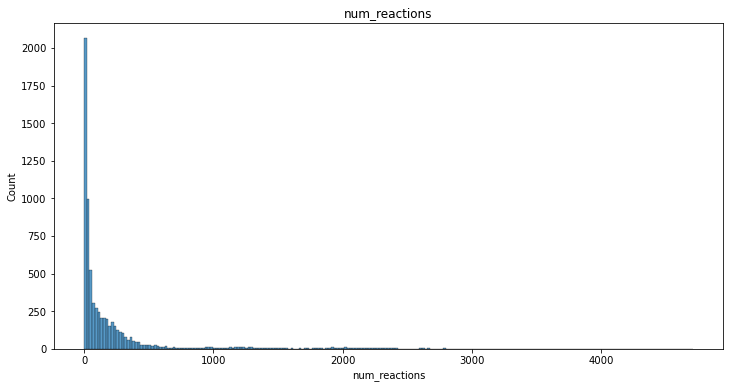

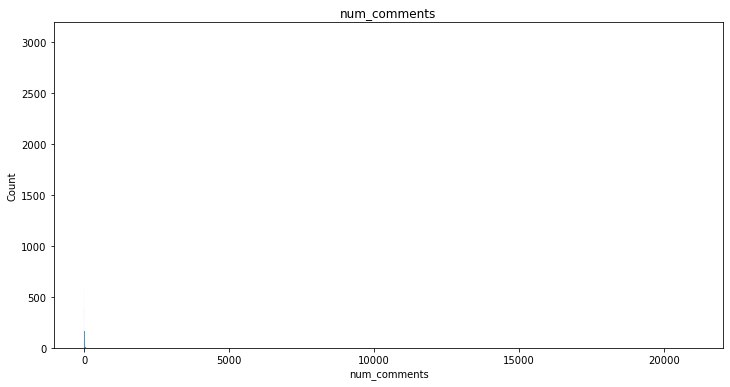

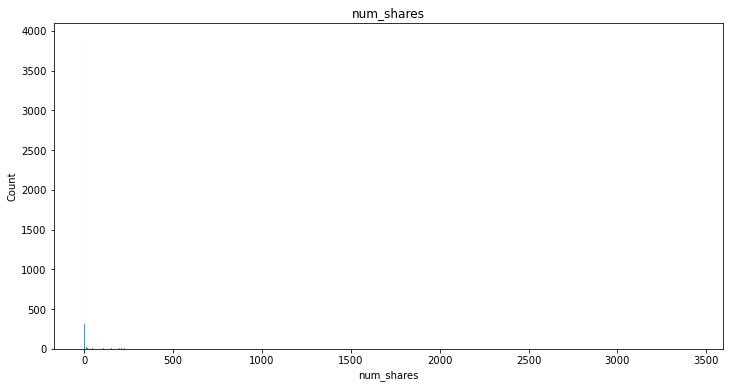

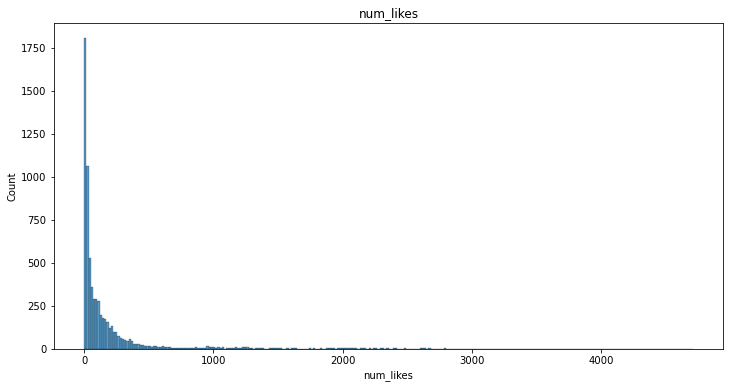

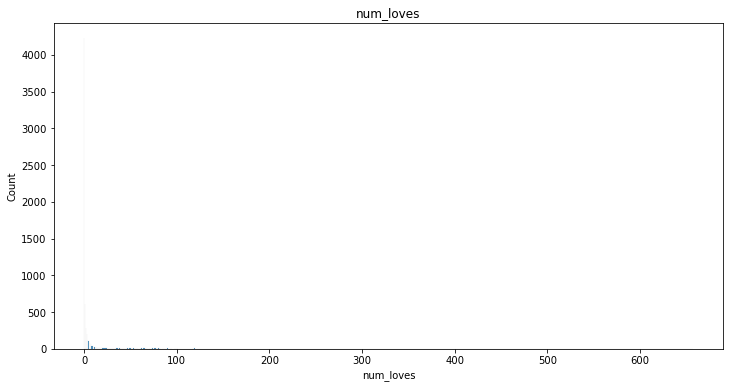

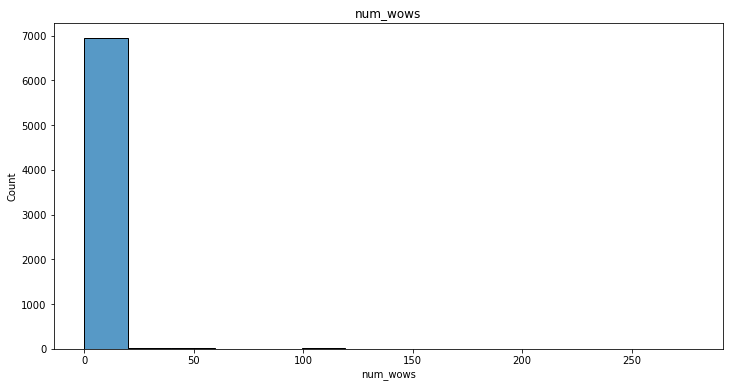

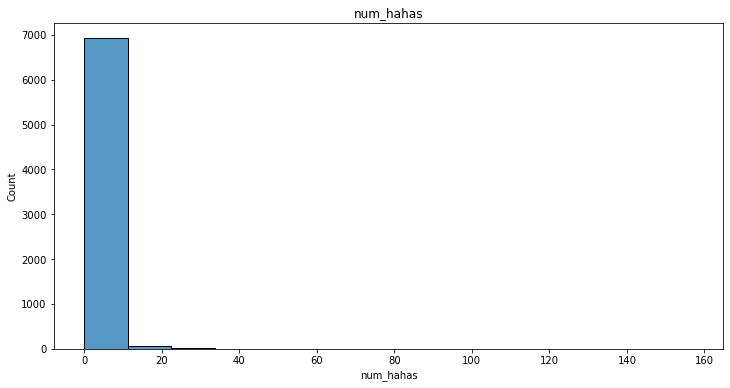

In [11]:
mod.plotVars(dataset, vars =continues_vars)

### Histograma de Variables Discretas

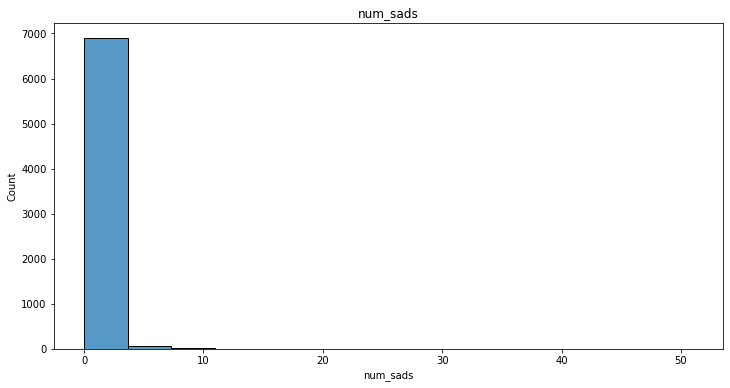

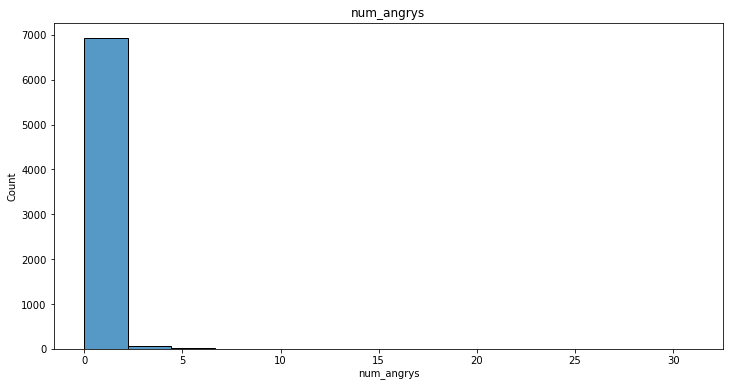

In [12]:
mod.plotVars(dataset, vars =discrete_vars)

### Gráfico de Frecuencia de Variables Categoricas

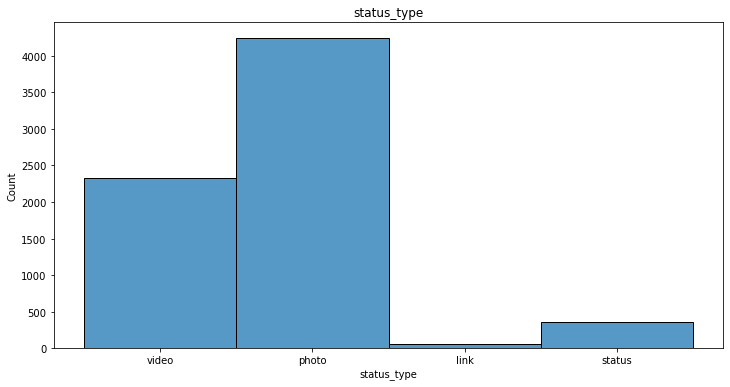

In [13]:
categoric_vars.sort(reverse=True)
categoric_vars.pop()
categoric_vars.pop()
mod.plotVars(dataset, vars = categoric_vars)

### Estadísticas de Variables Continuas y Discretas

In [14]:
mod.stats(dataset, vars = continues_vars)

Estadísticas de num_reactions {'Media': 224.99, 'Max': 4710, 'Min': 0, 'Desv': 452.88, 'Rango': 199}
Estadísticas de num_comments {'Media': 225.55, 'Max': 20990, 'Min': 0, 'Desv': 892.74, 'Rango': 22}
Estadísticas de num_shares {'Media': 40.26, 'Max': 3424, 'Min': 0, 'Desv': 132.05, 'Rango': 4}
Estadísticas de num_likes {'Media': 209.95, 'Max': 4710, 'Min': 0, 'Desv': 439.55, 'Rango': 165}
Estadísticas de num_loves {'Media': 12.75, 'Max': 657, 'Min': 0, 'Desv': 40.11, 'Rango': 3}
Estadísticas de num_wows {'Media': 1.25, 'Max': 278, 'Min': 0, 'Desv': 8.73, 'Rango': 0}
Estadísticas de num_hahas {'Media': 0.7, 'Max': 157, 'Min': 0, 'Desv': 3.97, 'Rango': 0}


In [15]:
mod.stats(dataset, vars = discrete_vars)

Estadísticas de num_sads {'Media': 0.23, 'Max': 51, 'Min': 0, 'Desv': 1.48, 'Rango': 0}
Estadísticas de num_angrys {'Media': 0.11, 'Max': 31, 'Min': 0, 'Desv': 0.69, 'Rango': 0}


### Gráfico de Serie Temporal

In [16]:
dfST = dataset
dfST['status_published'] = dfST['status_published'].apply(lambda x: x.split(' ')[0])
dfST['status_published'] = pd.to_datetime(dfST['status_published'], format='%m/%d/%Y')

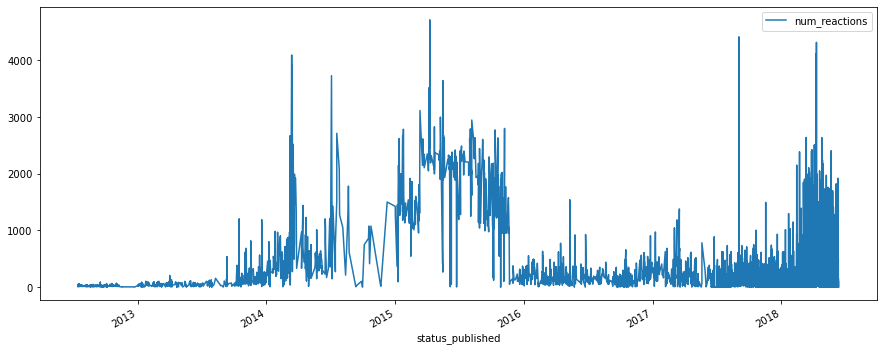

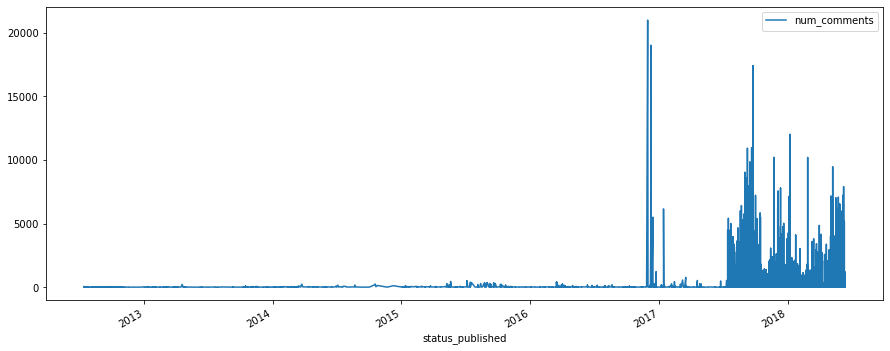

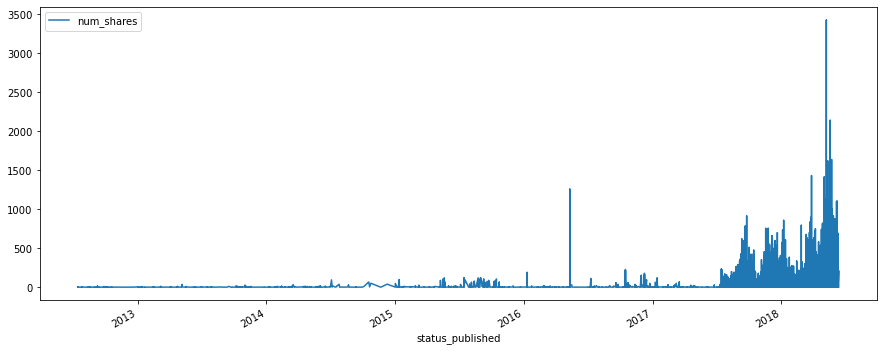

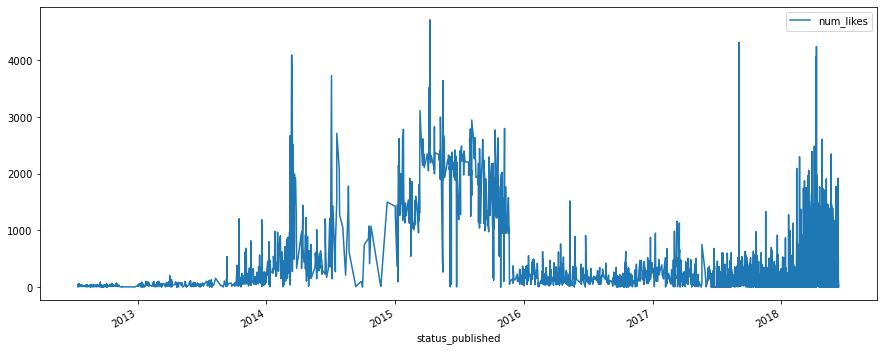

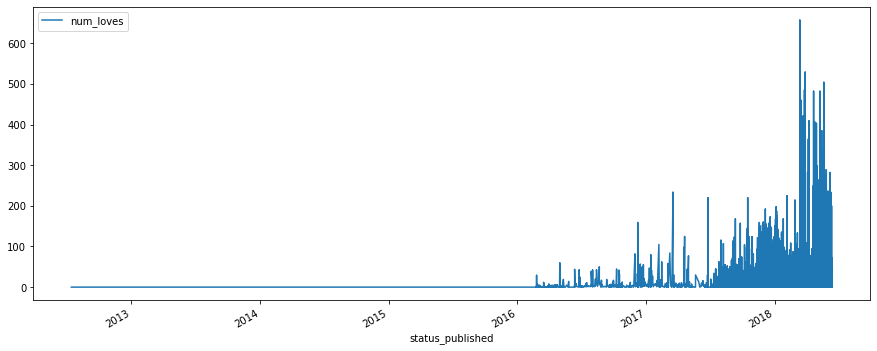

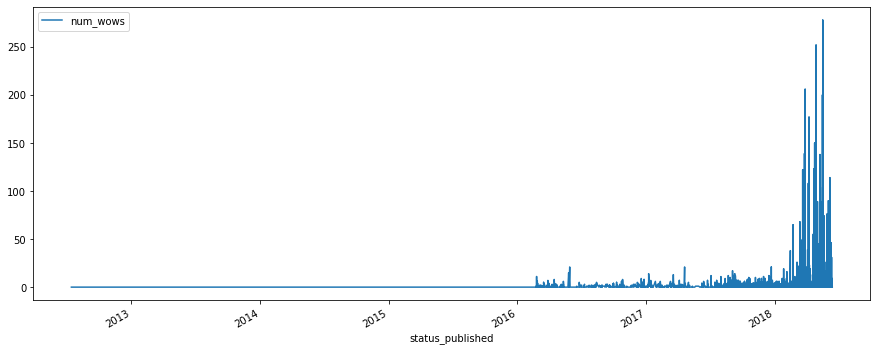

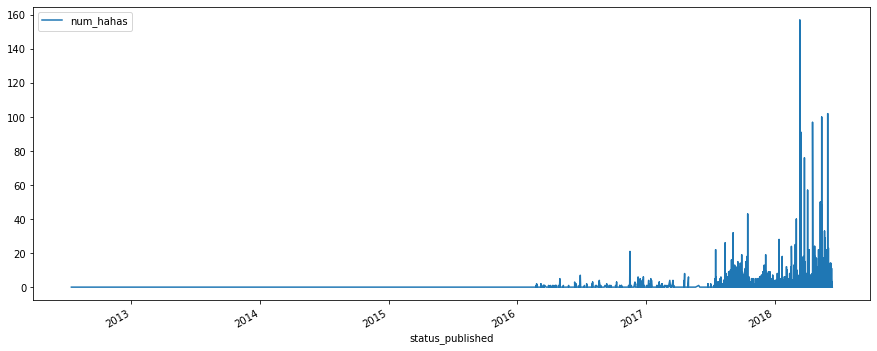

In [17]:
mod.plot_serie_temporal(dataset, continues_vars, 'status_published')

### Feature Engineering

In [18]:
dataset = pd.read_csv("Live.csv")
dataset = dataset.drop(['Column1', 'Column2', 'Column3','Column4'], axis=1)
dataset = dataset.drop_duplicates()
dataset

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


#### Codificación de Variables Categóricas

In [19]:
for col in categoric_vars:
    pp.executeFreqEncoding(dataset, map_type='freq')

In [20]:
datasetFE = dataset
datasetFE

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.0,2333.0,1.0,529,512,262,432,92,3,1,1,0
1,1.0,4244.0,1.0,150,0,0,150,0,0,0,0,0
2,1.0,2333.0,1.0,227,236,57,204,21,1,1,0,0
3,1.0,4244.0,1.0,111,0,0,111,0,0,0,0,0
4,1.0,4244.0,1.0,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1.0,4244.0,1.0,89,0,0,89,0,0,0,0,0
7046,1.0,4244.0,1.0,16,0,0,14,1,0,1,0,0
7047,1.0,4244.0,1.0,2,0,0,1,1,0,0,0,0
7048,1.0,4244.0,1.0,351,12,22,349,2,0,0,0,0


#### Feature Scaling

In [21]:
shape = datasetFE.shape
datasetFE[datasetFE.columns[1:(shape[1])]]

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2333.0,1.0,529,512,262,432,92,3,1,1,0
1,4244.0,1.0,150,0,0,150,0,0,0,0,0
2,2333.0,1.0,227,236,57,204,21,1,1,0,0
3,4244.0,1.0,111,0,0,111,0,0,0,0,0
4,4244.0,1.0,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,4244.0,1.0,89,0,0,89,0,0,0,0,0
7046,4244.0,1.0,16,0,0,14,1,0,1,0,0
7047,4244.0,1.0,2,0,0,1,1,0,0,0,0
7048,4244.0,1.0,351,12,22,349,2,0,0,0,0


In [22]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(datasetFE)

In [23]:
dataset_final = pd.DataFrame(scaler.transform(datasetFE), columns=datasetFE.columns)

In [24]:
#np.round(dataset_final.describe(), 2)

In [25]:
dataset_final['status_type'] = datasetFE['status_type']

In [26]:
scaled_features

array([[0.        , 0.54293231, 0.        , ..., 0.00636943, 0.01960784,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.54293231, 0.        , ..., 0.00636943, 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Separación de Variables Independientes y Dependiente

In [27]:
X = dataset_final.iloc[:, dataset_final.columns != 'status_type']
y = dataset_final.loc[:, 'status_type']

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=2022, shuffle=True)

### K-means

In [29]:
Ks = range(1, 11)
variabilidad = []

for k in Ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    variabilidad.append(model.inertia_)

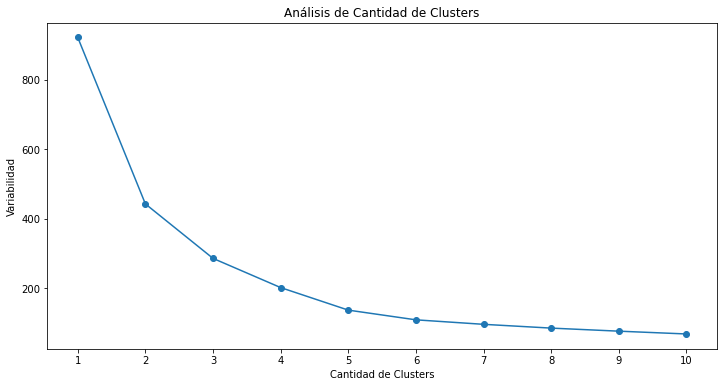

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(Ks, variabilidad, '-o')
plt.title("Análisis de Cantidad de Clusters")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Variabilidad")
plt.xticks(Ks)
plt.show()

In [31]:
MODEL = KMeans(n_clusters=4)
MODEL.fit(scaled_features)

KMeans(n_clusters=4)

In [32]:
dataset_final['Cluster'] = MODEL.predict(scaled_features)
dataset_final.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,0.0,2333.0,0.0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,2
1,0.0,4244.0,0.0,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0
2,0.0,2333.0,0.0,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,2
3,0.0,4244.0,0.0,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0
4,0.0,4244.0,0.0,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0


In [33]:
dataset_final['Cluster'].unique()

array([2, 0, 3, 1])

In [34]:
dataset_final['status_type'].unique()

array([2333., 4244.,   63.,  359.,   nan])

### PCA - Principal Component Analysis 

In [35]:
pca = PCA(n_components=11)

In [36]:
X_train_pca = pca.fit_transform(X)
#X_test_pca = pca.transform(X_test)

In [37]:
X_train_pca.shape

(6999, 11)

In [38]:
pca.explained_variance_ratio_

array([4.57158735e-01, 3.53020477e-01, 1.06369048e-01, 2.39806051e-02,
       1.45031872e-02, 1.16760526e-02, 1.08820266e-02, 9.13577166e-03,
       7.74541037e-03, 5.52868429e-03, 2.94224084e-09])

In [39]:
pca.explained_variance_ratio_.cumsum()

array([0.45715873, 0.81017921, 0.91654826, 0.94052886, 0.95503205,
       0.9667081 , 0.97759013, 0.9867259 , 0.99447131, 1.        ,
       1.        ])

#### Se observa que con 2 componentes ya se explica el 81% de la data y con 3 obtiene una mejora considerable de un 10%  y ya con 4 es menos significativa la mejora.

In [40]:
np.sum(pca.explained_variance_ratio_)

1.0

In [41]:
np.round(pca.components_, 2)

array([[-0.  ,  1.  , -0.04,  0.  ,  0.  , -0.04,  0.01,  0.  , -0.  ,
        -0.  , -0.  ],
       [ 0.  ,  0.05,  0.7 ,  0.07,  0.09,  0.67,  0.17,  0.07,  0.04,
         0.02,  0.03],
       [-0.  , -0.02, -0.1 ,  0.38,  0.43, -0.21,  0.72,  0.19,  0.17,
         0.11,  0.11],
       [ 0.  ,  0.  , -0.02,  0.8 ,  0.08,  0.06, -0.36, -0.42, -0.06,
         0.22, -0.03],
       [-0.01,  0.  ,  0.  , -0.19, -0.14, -0.01, -0.01,  0.1 ,  0.06,
         0.96,  0.07],
       [ 0.  , -0.  , -0.01,  0.32, -0.05, -0.01, -0.33,  0.87, -0.03,
        -0.03, -0.14],
       [ 1.  ,  0.  , -0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,
         0.01, -0.  ],
       [-0.  ,  0.  ,  0.01,  0.1 , -0.35, -0.01, -0.05, -0.03,  0.92,
        -0.1 ,  0.1 ],
       [ 0.  ,  0.  , -0.01,  0.06, -0.11,  0.  , -0.09,  0.08, -0.16,
        -0.08,  0.97],
       [-0.  ,  0.  , -0.02, -0.25,  0.8 ,  0.03, -0.44,  0.  ,  0.29,
         0.03,  0.12],
       [ 0.  ,  0.  ,  0.7 , -0.  ,  0.  , -0.7 , -0.1 , -0.

In [42]:
dataset.columns[11]

'num_angrys'

### Kmeans con PCA

In [43]:
pca = PCA(n_components=2)

In [44]:
X_train_pca = pca.fit_transform(X)

In [45]:
Ks = range(1, 11)
variabilidad = []

for k in Ks:
    model = KMeans(n_clusters=k)
    model.fit(X_train_pca)
    variabilidad.append(model.inertia_)

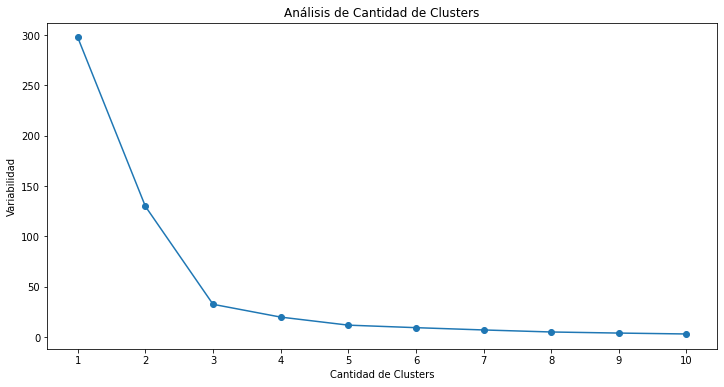

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(Ks, variabilidad, '-o')
plt.title("Análisis de Cantidad de Clusters")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Variabilidad")
plt.xticks(Ks)
plt.show()

In [47]:
MODEL = KMeans(n_clusters=4)
MODEL.fit(scaled_features)

KMeans(n_clusters=4)

In [48]:
dataset_final['Cluster'] = MODEL.predict(scaled_features)
dataset_final.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,0.0,2333.0,0.0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0
1,0.0,4244.0,0.0,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1
2,0.0,2333.0,0.0,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0
3,0.0,4244.0,0.0,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1
4,0.0,4244.0,0.0,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1


In [49]:
df = dataset_final
#df['Cluster'] = df['Cluster'].map({'4244.0':'s',  '3':'b'}, na_action=None)

### Accuracy de la Clasificación

In [50]:
df['status_type'] = df['status_type'].replace([4244.0, 2333.0, 359.0, 63.0],['a','b','d','c']) #, 'photo', 'link', 'status'    , 'b', 'c','d'
df['Cluster'] = df['Cluster'].replace([0, 1, 2, 3],['a','b','d','c'])
#df.isin({'status_type': [4244.0]})
conditions = [df['status_type'] == df['Cluster']]
choices = ['Accuracy']
df['Acc'] = np.select(conditions, choices)
#df.to_csv("Da.csv")
acc = df['Acc'].value_counts() / len(df)
print(acc)#(f'Accuracy: {acc}')

0           0.96028
Accuracy    0.03972
Name: Acc, dtype: float64


### TSNE

In [51]:
from sklearn.manifold import TSNE

In [52]:
tsne = TSNE(n_components=2, verbose=1, random_state=1234)
z = tsne.fit_transform(X) 

C:\Users\Ferickcen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Ferickcen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6999 samples in 0.029s...
[t-SNE] Computed neighbors for 6999 samples in 0.714s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6999
[t-SNE] Computed conditional probabilities for sample 2000 / 6999
[t-SNE] Computed conditional probabilities for sample 3000 / 6999
[t-SNE] Computed conditional probabilities for sample 4000 / 6999
[t-SNE] Computed conditional probabilities for sample 5000 / 6999
[t-SNE] Computed conditional probabilities for sample 6000 / 6999
[t-SNE] Computed conditional probabilities for sample 6999 / 6999
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.293072
[t-SNE] KL divergence after 1000 iterations: 0.592887


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

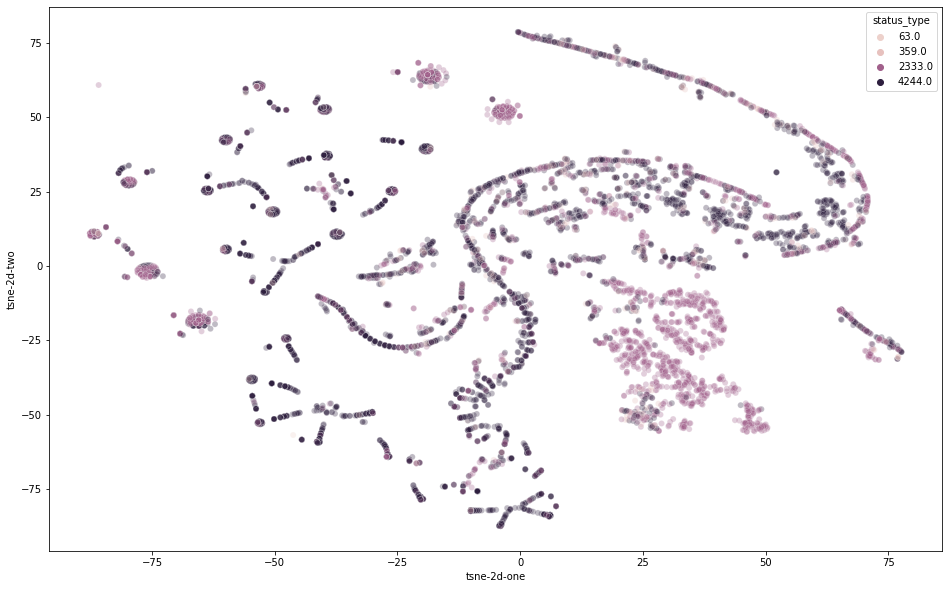

In [53]:
dataset_final['tsne-2d-one'] = z[:,0]
dataset_final['tsne-2d-two'] = z[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y,
    #palette=sns.color_palette("hls", 4),
    data=dataset_final,
    legend="full",
    alpha=0.3
)

In [54]:
Ks = range(1, 11)
variabilidad = []

for k in Ks:
    model = KMeans(n_clusters=k)
    model.fit(z)
    variabilidad.append(model.inertia_)

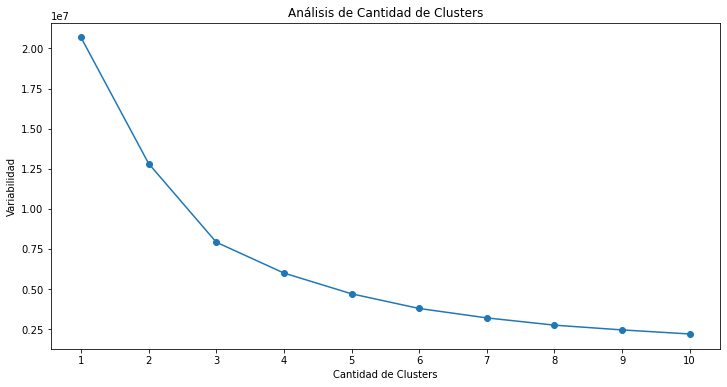

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(Ks, variabilidad, '-o')
plt.title("Análisis de Cantidad de Clusters")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Variabilidad")
plt.xticks(Ks)
plt.show()

### Clustering Jerarquíco

#### Dendograma

#### Se grafícará un dendograma con la data original para determinar la cantidad de clusters a utilizar, la línea cruzará la línea vertial cuya altura sea la más alta.

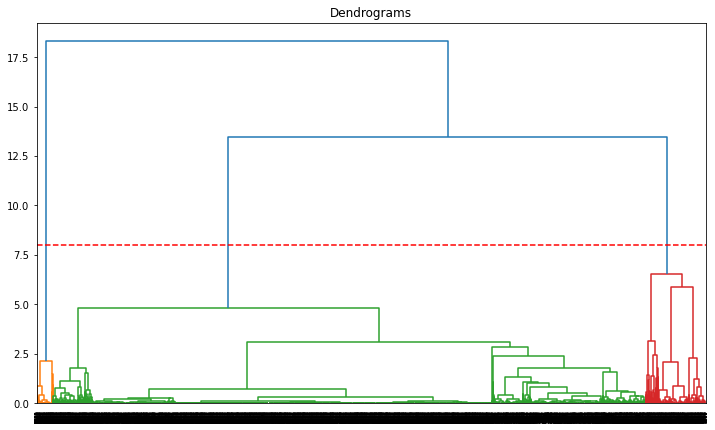

In [56]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')

#### Según el método se deben crear 3 clusters

In [57]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [58]:
#MODEL = KMeans(n_clusters=4)
#MODEL.fit(scaled_features)

In [59]:
dataset_final['Cluster2'] = cluster.fit_predict(X)
dataset_final.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster,Acc,tsne-2d-one,tsne-2d-two,Cluster2
0,0.0,b,0.0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,a,0,41.739349,-39.294727,2
1,0.0,a,0.0,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,b,0,23.335846,35.269627,2
2,0.0,b,0.0,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,a,0,32.192238,-9.260160,2
3,0.0,a,0.0,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,b,0,5.789917,33.505047,2
4,0.0,a,0.0,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,b,0,39.339180,15.712185,2


In [60]:
dataset_final['Cluster2'].unique()

array([2, 1, 0], dtype=int64)

### Accuracy de la Predicción

In [62]:
df = dataset_final

In [63]:
df['status_type'] = df['status_type'].replace([4244.0, 2333.0, 359.0, 63.0],['a','b','d','c']) #, 'photo', 'link', 'status'    , 'b', 'c','d'
df['Cluster2'] = df['Cluster2'].replace([0, 1, 2],['c','b','a'])
#df.isin({'status_type': [4244.0]})
conditions = [df['status_type'] == df['Cluster2']]
choices = ['Accuracy']
df['Acc2'] = np.select(conditions, choices)
#df.to_csv("Da.csv")
acc = df['Acc2'].value_counts() / len(df)
print(acc)#(f'Accuracy: {acc}')

Accuracy    0.562366
0           0.437634
Name: Acc2, dtype: float64


### Conclusión

### El mejor modelo se obtuvo aplicando PCA y luego K-means,  si bien es el mismo accuracy (87%) que sin PCA la reducción de dimensionalidad permite construir un modelo igual de bueno pero con menos columnas. El modelo de Jerarquía al reconocer 3 categorías obtuvo menor rendimiento (56%), pero puede servir para complementar lo obtenido con K-means